In [1]:
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import sys
sys.path.append('src')
import uniformize

In [2]:
# Utility functions

def run(NL, NR, NIter, gamma, TL, TR, log, NMed):
    
    command = "src/piston {0} {1} {2} {3} {4} {5} {6}".format(NL, NR, NIter, gamma, TL, TR, NMed)
    if(log == True):
        command = "src/pistonlog {0} {1} {2} {3} {4} {5} {6}".format(NL, NR, NIter, gamma,TL, TR, NMed)
        
    p = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    a = p.stdout.readlines()
    
    observable = [np.loadtxt("observables{0}.dat".format(i)) for i in range(NMed)] 
    
    logdata = np.array([])
    if(log == True):
        logdata = np.loadtxt("log.dat")
    return a, observable, logdata



In [4]:
# Run the program
NL    = 100   # Number of particles in the left
NR    = 100   # Number of particles in the right
NIter = 10000 # Number of iterations
gamma = 0.01  # Mass of one particle divided by the mass of the piston
TR    = 0.1   # Initial temperature of the left gas
TL    = 0.1   # Initial temperature of the right gast
NMED  = 10   # Number of averages

N = NL + NR # Total number of particles

output, obs, logdata = run(NL, NR, NIter, gamma, TL, TR, False, NMED)
for i in output:
    print(i.decode('utf-8'),end="")

Program parameters:
NL:      100
NR:      100
NIter:   10000
gamma:   0.01
TL:      0.1
TR:      0.1
Nmedias: 10


In [28]:
# Find the smallest last time and create uniform time array
smallest_maxt = min([i[-1,0] for i in obs])
dt = smallest_maxt/NIter
dt = 0.1
NT = int(smallest_maxt/dt)
print("max time:",smallest_maxt)
print("dt:",dt)
print("NT:", NT)
tarray = np.linspace(0,smallest_maxt, NT)

# uniformize the outputs
uniforms = []
for ob in obs:
    uniforms.append(uniformize.uniformize(ob, tarray))

# The code returns the transfer of momentum. We want the transfer of momentum per unit time
for un in uniforms:
    un[:,4] /= dt
    
# Perform the averages and calculate the standard deviation
av = np.zeros([NT, 5])
dev = np.zeros([NT, 5])

for i in range(NMED):
    av += uniforms[i]/NMED

for i in range(NMED):
    dev += (uniforms[i] - av)**2/NMED
dev = np.sqrt(dev)


max time: 12.3226965
dt: 0.1
NT: 123


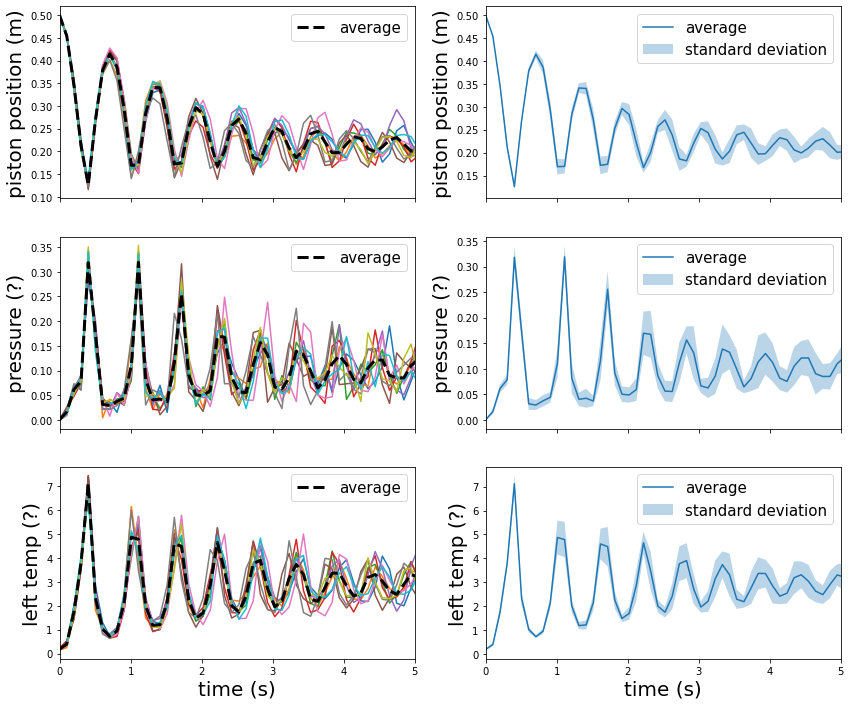

In [29]:
fig, axs = plt.subplots(3,2,sharex=True)
fig.set_figheight(12)
fig.set_figwidth(14)

# Plot some of the graphs
for i in range(10):
    axs[0,0].plot(uniforms[i][:,0], uniforms[i][:,1])
axs[0,0].plot(av[:,0], av[:,1], 'k--', linewidth=3, label = "average")
axs[0,0].set_xlim(0,5)
#axs[0,0].set_xlabel("time (s)", fontsize=20)
axs[0,0].set_ylabel("piston position (m)", fontsize=20)
axs[0,0].legend(fontsize=15)

# Plot the average and the standard deviation of the piston position
axs[0,1].fill_between(av[:,0], av[:,1]-dev[:,1], av[:,1]+dev[:,1],alpha=0.3, label="standard deviation")
axs[0,1].plot(av[:,0], av[:,1], label = "average")
#axs[0,1].set_xlabel("time (s)", fontsize=20)
axs[0,1].set_ylabel("piston position (m)", fontsize=20)
axs[0,1].legend(fontsize=15)




# Pressure
for i in range(10):
    axs[1,0].plot(uniforms[i][:,0], uniforms[i][:,4])
axs[1,0].plot(av[:,0], av[:,4], 'k--',  linewidth=3, label = "average")
axs[1,0].set_xlim(0,5)
#axs[1,0].set_xlabel("time (s)", fontsize=20)
axs[1,0].set_ylabel("pressure (?)", fontsize=20)
axs[1,0].legend(fontsize=15)

# Plot the average and the standard deviation of the piston pressure
axs[1,1].fill_between(av[:,0], av[:,4]-dev[:,4], av[:,4]+dev[:,4],alpha=0.3, label="standard deviation")
axs[1,1].plot(av[:,0], av[:,4], label = "average")
#axs[1,1].set_xlabel("time (s)", fontsize=20)
axs[1,1].set_ylabel("pressure (?)", fontsize=20)
axs[1,1].legend(fontsize=15)




# Temperature
for i in range(10):
    axs[2,0].plot(uniforms[i][:,0], uniforms[i][:,2])
axs[2,0].plot(av[:,0], av[:,2], 'k--',  linewidth=3, label = "average")
axs[2,0].set_xlim(0,5)
axs[2,0].set_xlabel("time (s)", fontsize=20)
axs[2,0].set_ylabel("left temp (?)", fontsize=20)
axs[2,0].legend(fontsize=15)

# Plot the average and the standard deviation of the piston pressure
axs[2,1].fill_between(av[:,0], av[:,2]-dev[:,2], av[:,2]+dev[:,2],alpha=0.3, label="standard deviation")
axs[2,1].plot(av[:,0], av[:,2], label = "average")
axs[2,1].set_xlabel("time (s)", fontsize=20)
axs[2,1].set_ylabel("left temp (?)", fontsize=20)
axs[2,1].legend(fontsize=15)


plt.show()


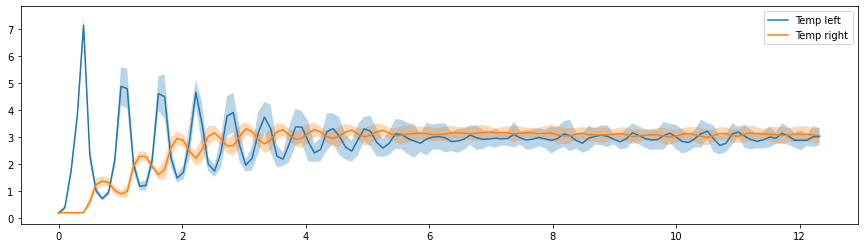

In [33]:
fig, axs = plt.subplots(1,1)
fig.set_figheight(4)
fig.set_figwidth(15)

# Plot some of the graphs
axs.plot(av[:,0], av[:,2], label = "Temp left")
axs.fill_between(av[:,0], av[:,2]-dev[:,2], av[:,2]+dev[:,2],alpha=0.3)
axs.plot(av[:,0], av[:,3], label = "Temp right")
axs.fill_between(av[:,0], av[:,3]-dev[:,3], av[:,3]+dev[:,3],alpha=0.3)
axs.legend()
plt.show()


In [36]:
%reset

import matplotlib.pyplot as plt
import numpy as np
import subprocess
import sys
sys.path.append('src')
import uniformize

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [104]:
NA = 100
EL = np.zeros((NIter,NA))
for i in range(NA):
    output, obs, logdata = run(NL, NR, NIter, gamma, True)
    EL[:,i] = obs[:,1]

TypeError: run() missing 2 required positional arguments: 'TR' and 'log'

In [ ]:
soma = EL[:,0] * 0
for i in range(NA):
    soma += EL[:,i]
soma /= NA

In [ ]:
plt.plot(soma)
plt.plot(EL[:,0])

In [ ]:
plt.plot(obs[:,2])
plt.plot(obs[:,3])

Program parameters:
NL: 20
NR: 20
NIter: 200
gamma: 0.01
TL: 0.1
TR: 0.1


(-0.1, 1.1)

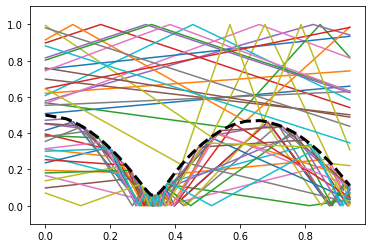

In [162]:
NL = 20
NR = 20
N = NL + NR
NIter = 200
gamma = 0.01
TR = 0.1
TL = 0.1
NMED = 1

output, obs, logdata = run(NL, NR, NIter, gamma, TL, TR, True,NMED)
ts = obs[:,0]
xm = obs[:,1]


# Only run this cell if logdata exists
# If logdata exists, it will have every position of every particle
# %matplotlib inline
positions = np.zeros([NIter, N])
for i in range(N):
    positions[:,i] = logdata[:,3 + i*5]
    
fig, axs = plt.subplots(1,1)
for i in range(N):
    axs.plot(ts,positions[:,i])
#     axs.plot(positions[:,i],'o-')
    
axs.plot(ts,logdata[:,1], 'k--', linewidth=3)
# axs.plot(logdata[:,1], 'ko--', linewidth=3)
axs.set_ylim(-0.1, 1.1)
# axs.set_xlim(0.325, 0.37)
# axs.set_xlim(80, 90)